# Medical Insurance Cost Prediction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Overview 👩🏻‍💻

## Dataset
The dataset comprises 2.7K rows and 7 columns, including:
- Age
- Sex
- BMI (Body Mass Index)
- Children
- Smoker
- Region
- Charges


## Problem Statement:
- What are the primary factors influencing medical expenses?
- How accurate are machine learning models in predicting medical expenses?
- In what ways can machine learning models enhance the efficiency and profitability of health insurance companies?

In [4]:
data = pd.read_csv('medical_insurance.csv')
data.sample(10)

,age,sex,bmi,children,smoker,region,charges
841,59,male,24.700,0,no,northeast,12323.93600
2163,45,male,39.805,0,no,northeast,7448.40395
2681,20,male,22.000,1,no,southwest,1964.78000
902,26,male,27.265,3,no,northeast,4661.28635
511,27,male,33.660,0,no,southeast,2498.41440
456,55,female,30.140,2,no,southeast,11881.96960
1878,18,female,25.080,0,no,northeast,2196.47320
2196,46,female,30.800,3,no,southwest,9414.92000
924,43,male,23.200,0,no,southwest,6250.43500
1740,18,female,38.280,0,no,southeast,14133.03775


# Check missing data 🕵🏻‍♀️

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [9]:
data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


The dataset contains 2772 entries with no missing values across 7 columns, providing demographic and insurance cost data, including age, BMI, number of children, smoker status, region, and charges.

# Converting Categorical Features to Numerical 🏃🏻‍♀️‍➡️

In [15]:
data_copy = data.copy()
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
categ_to_num = {'sex': {'male' : 0 , 'female' : 1},
              'smoker': {'no': 0 , 'yes' : 1},
              'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
             }
data_copy.replace(categ_to_num, inplace = True)

/var/folders/0f/3q1rn1_d089d85w405_m22bm0000gn/T/ipykernel_19797/325131567.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy.replace(categ_to_num, inplace = True)


In [19]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   int64  
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   int64  
 5   region    2772 non-null   int64  
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


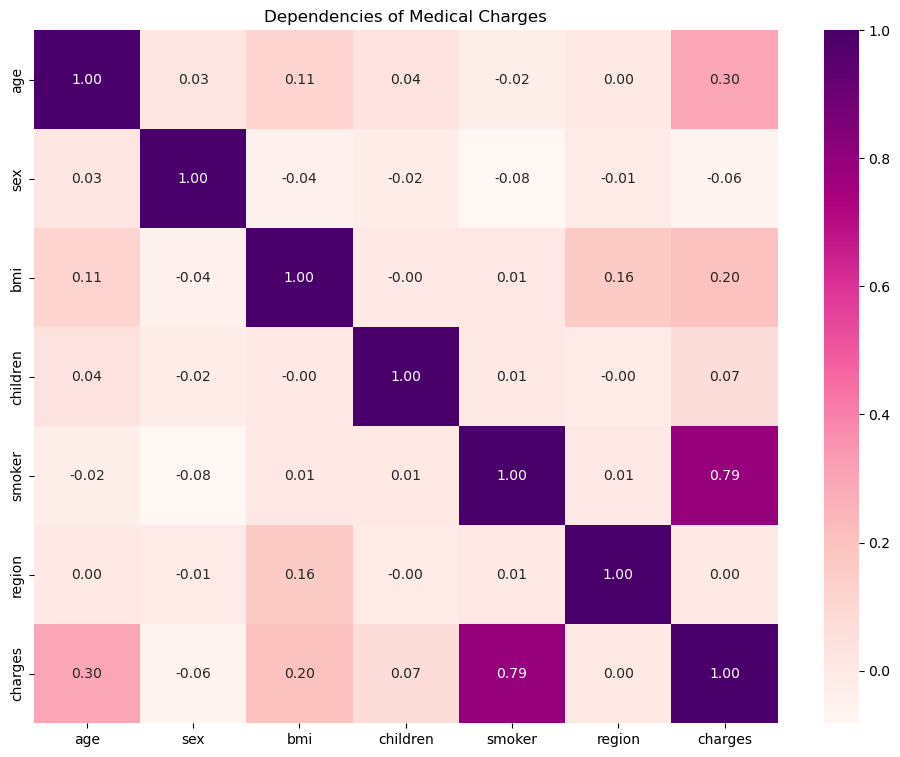

In [21]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, cmap='RdPu', annot=True, fmt=".2f", ax=ax)
plt.title("Dependencies of Medical Charges")
plt.savefig('Cor')
plt.show()

Based on the heatmap, we can observe that the columns **sex**, **children**, and **region** have very low or **no correlation with medical charges**, indicating that they do not significantly affect the charges. \
\
On the other hand, the columns **age**, **bmi**, and especially **smoker** show a **stronger correlation with charges**. \
*Specifically, smoker has a very strong positive correlation*

In [24]:
print(data['sex'].value_counts().sort_values()) 

sex
female    1366
male      1406
Name: count, dtype: int64


In [26]:
print(data['smoker'].value_counts().sort_values())

smoker
yes     564
no     2208
Name: count, dtype: int64


In [28]:
print(data['region'].value_counts().sort_values())

region
northeast    658
northwest    664
southwest    684
southeast    766
Name: count, dtype: int64


/var/folders/0f/3q1rn1_d089d85w405_m22bm0000gn/T/ipykernel_19797/3285593028.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='charges', data=data_copy, palette='RdPu')


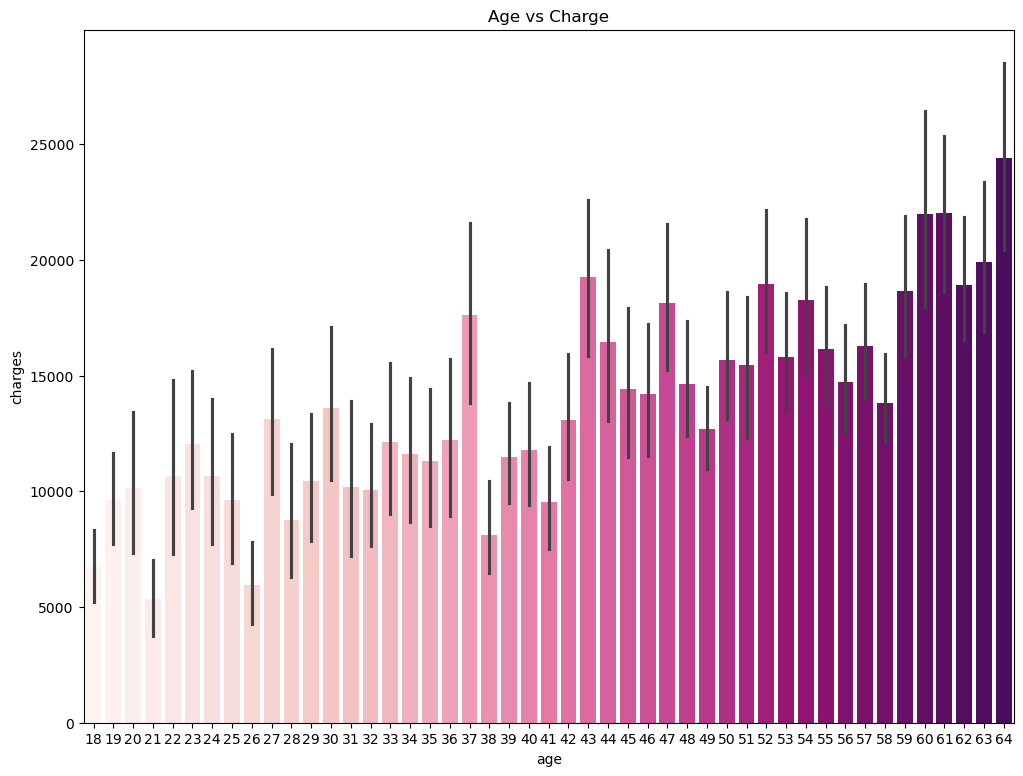

In [30]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age', y='charges', data=data_copy, palette='RdPu')
plt.savefig('AgevsCharges')

/var/folders/0f/3q1rn1_d089d85w405_m22bm0000gn/T/ipykernel_19797/1704125184.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region',y='charges',data=data_copy,palette='RdPu')


<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

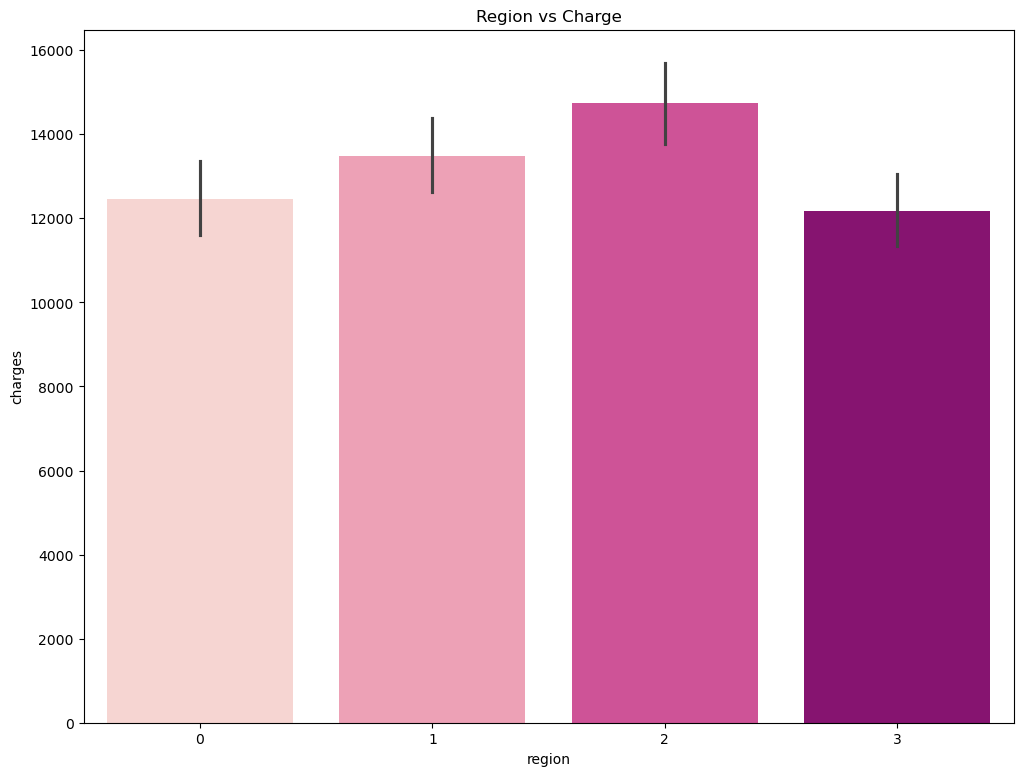

In [31]:
plt.figure(figsize=(12,9))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data_copy,palette='RdPu')

Text(0.5, 1.0, 'BMI VS Charge')

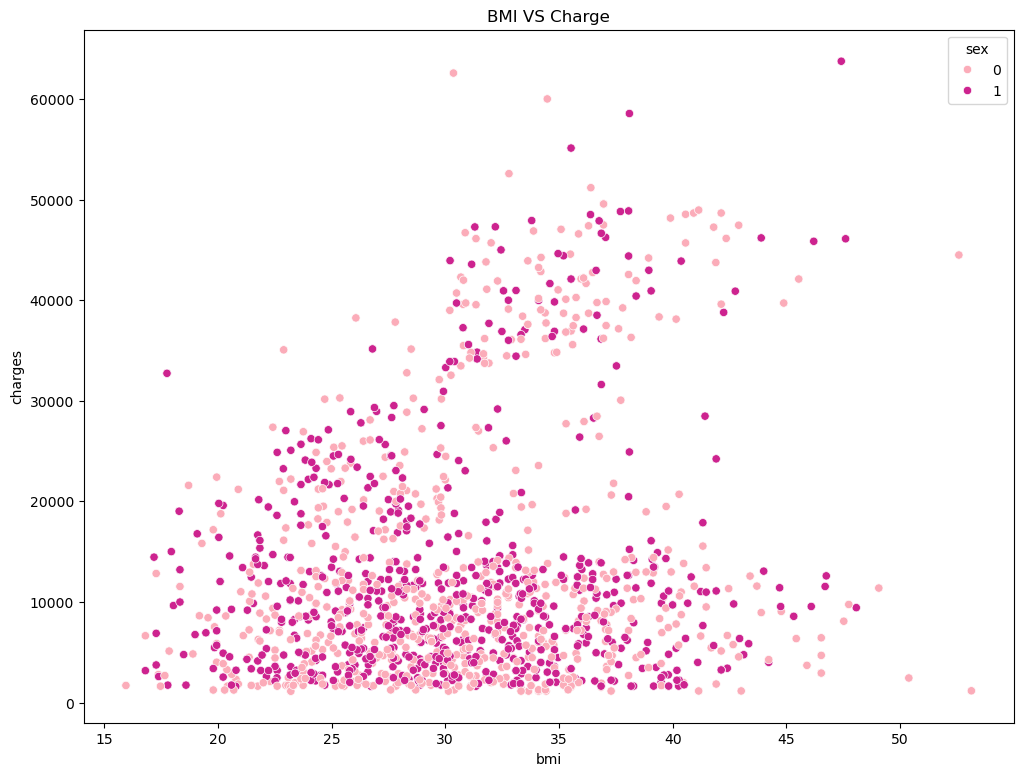

In [33]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data_copy,palette='RdPu')
plt.title('BMI VS Charge')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

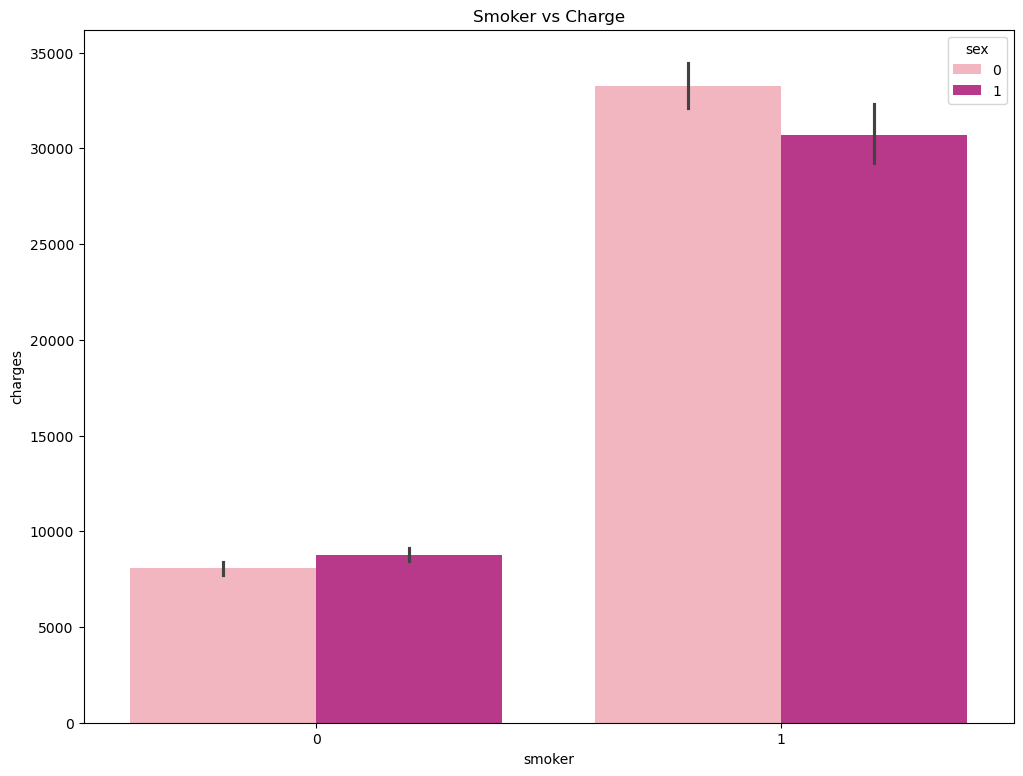

In [36]:
plt.figure(figsize=(12,9))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data_copy,palette='RdPu',hue='sex')

/var/folders/0f/3q1rn1_d089d85w405_m22bm0000gn/T/ipykernel_19797/3237246041.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex',y='charges',data=data_copy,palette='RdPu')


<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

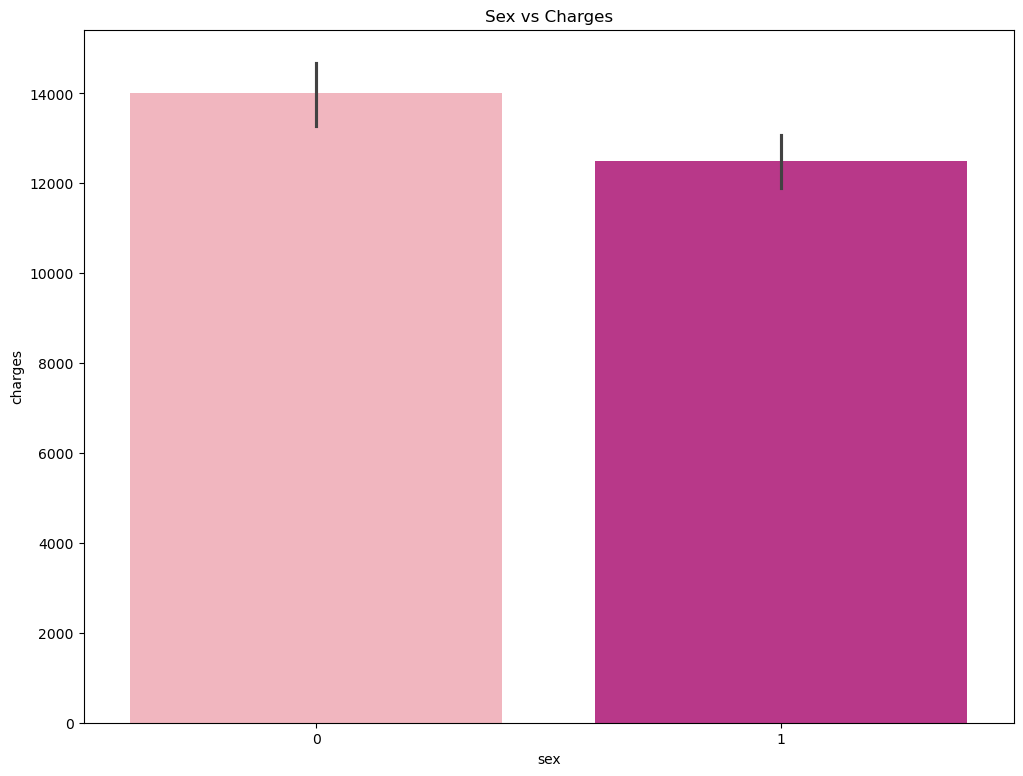

In [38]:
plt.figure(figsize=(12,9))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data_copy,palette='RdPu')

## Train and Test Datasets

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.model_selection import train_test_split

X = data_copy.drop('charges', axis=1)
y = data_copy['charges']

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train.head()

,age,sex,bmi,children,smoker,region
1864,21,0,36.85,0,0,2
1997,38,1,34.80,2,0,3
1336,21,1,25.80,0,0,3
655,52,1,25.30,2,1,2
261,20,1,26.84,1,1,2


In [46]:
y_train.head()

1864     1534.3045
1997     6571.5440
1336     2007.9450
655     24667.4190
261     17085.2676
Name: charges, dtype: float64

In [48]:
X_test.head()

,age,sex,bmi,children,smoker,region
1106,49,1,29.925,0,0,0
1321,62,0,26.695,0,1,1
2313,57,1,20.100,1,0,3
2274,22,0,39.500,0,0,3
1432,18,1,38.665,2,0,1


In [50]:
y_test.head()

1106     8988.15875
1321    28101.33305
2313    12032.32600
2274     1682.59700
1432     3393.35635
Name: charges, dtype: float64

# Preprocessing

In [93]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

encoder = OneHotEncoder()

In [95]:
X_test['children'].value_counts()

children
0    244
1    126
2    107
3     58
5     11
4      9
Name: count, dtype: int64

In [117]:
numerical_columns = ['age','children', 'bmi']
numerical_pipeline = make_pipeline(StandardScaler())

In [156]:
categorical_columns = ['region']
categorical_pipeline = make_pipeline(OneHotEncoder())

In [158]:
to_pass = ['sex','smoker']

In [160]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_pipeline, numerical_columns),
        ("cat", categorical_pipeline, categorical_columns),
        ('pass', 'passthrough', to_pass)
    ]
)

In [172]:
X_train_transformed = preprocessor.fit_transform(X_train).shape

In [174]:
X_test_transformed = preprocessor.transform(X_test).shape

## Linear Regression

## Random Forest

## Gradient Boosting